<a href="https://colab.research.google.com/github/lavatus/CS114.L21/blob/main/Report_Hand_Written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Đề bài
Yêu cầu code: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
* Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
* Truy cập webcam của máy tính từ colab.
* Chụp ảnh một tờ giấy đang được giơ ra trước webcam
* Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.

Yêu cầu phân tích: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau:
* Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
* Ủa mà nhìn vào đâu để kết luận là tốt hay không?
* Nếu không tốt thì lý do tại sao?
* Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

# 2) Nhóm thực hiện
* Nguyễn Trung Tuấn - 19522477
* Dương Nguyễn Thuận - 19522312
* Nguyễn Việt Thư - 19522359

# 3) Code

In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


Automatically created module for IPython interactive environment


## Kiểm tra xem miền giá trị của pixel

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


### Kết quả kiểm tra: 
* Sau khi kiểm tra chúng em nhận thấy giá trị của từng pixel trong ảnh nằm trong đoạn từ 0 đến 16 vì vậy bọn em quyết định đưa giá trị của chúng về đoạn [0,1] cho để cho model train nhanh hơn đồng thời lúc test cũng đưa ảnh về từ [0,1] cho đồng bộ

In [4]:
for i in range(len(digits.images)):
  digits.images[i]/=np.max(digits.images[i])

In [5]:
print(digits.images[0])

[[0.         0.         0.33333333 0.86666667 0.6        0.06666667
  0.         0.        ]
 [0.         0.         0.86666667 1.         0.66666667 1.
  0.33333333 0.        ]
 [0.         0.2        1.         0.13333333 0.         0.73333333
  0.53333333 0.        ]
 [0.         0.26666667 0.8        0.         0.         0.53333333
  0.53333333 0.        ]
 [0.         0.33333333 0.53333333 0.         0.         0.6
  0.53333333 0.        ]
 [0.         0.26666667 0.73333333 0.         0.06666667 0.8
  0.46666667 0.        ]
 [0.         0.13333333 0.93333333 0.33333333 0.66666667 0.8
  0.         0.        ]
 [0.         0.         0.4        0.86666667 0.66666667 0.
  0.         0.        ]]


### Show thử hình ảnh và label của chúng

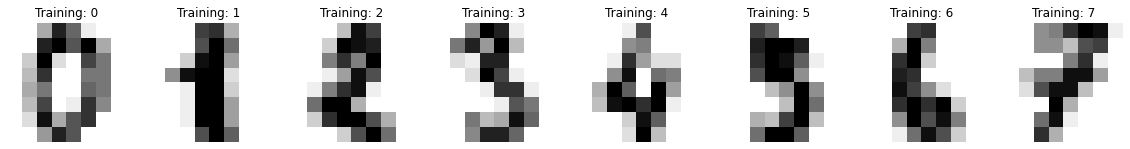

In [6]:

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Train model

In [105]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.1)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

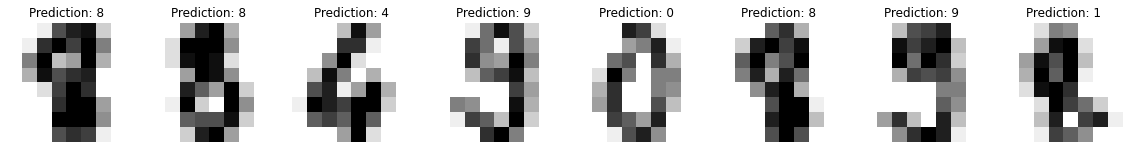

In [8]:
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [9]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.98      0.97        91
           2       0.99      0.98      0.98        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.94      0.95      0.95        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  2]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  1 79  0  3  0  4  4  0]
 [ 0  0  0  0 88  0  0  0  1  3]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  2  0  0  0  1  0  0 84  1]
 [ 0  0  0  1  0  2  0  1  0 88]]


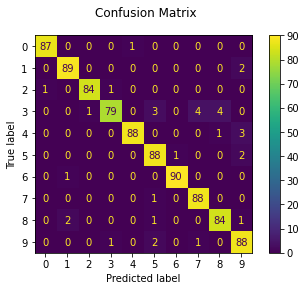

In [10]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Nhận xét sơ về model sau khi train dựa trên bảng Confusion Matrix :
* Số 3 là số dự đoán sai nhiều nhất 
* Các trường hợp số 4 dự đoán sai đều được dự đoán thành số 9 (chúng ta sẽ kiểm tra thử xem sao)
* Các trường hợp dự đoán sai thường được dự đoán là số 9

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Chụp ảnh từ webcam và kiểm tra trên dữ liệu viết tay cá nhân

### Thêm 1 số thư viện cần thiết để xử lí ảnh chụp từ webcam và show thử hình ảnh được chụp từ webcam

In [28]:
from IPython.display import Image
import cv2
def Test():
  try:
    filename = take_photo()
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
  # Xử lí dữ liệu đầu vào  
  img=cv2.imread('photo.jpg',0)
  #img = cv2.GaussianBlur(img, (5, 5), 0)
  #_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
  plt.imshow(img,cmap='gray')
  img=cv2.resize(img,(8,8),interpolation = cv2.INTER_AREA)
  img=img/np.max(img)
  img=img.reshape(1,64)
  predicted=clf.predict(img)
  plt.title('Predict'+str(predicted))
  plt.show()

### Chụp hình từ webcam và test 20 số viết tay ( mỗi số 0->9 test 2 lần )

In [ ]:
for i in range(10):
  Test()

#4) Trả lời câu hỏi
* **Câu 1: Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?**

    Trả lời: Không thực sự tốt.
* **Câu 2: Nhìn vào đâu để kết luận là tốt hay không?**

    Trả lời: Nhìn vào kết quả của khi chụp từ webcam (đấy là kết quả với model của riêng nhóm em).

* **Câu 3: Nếu không tốt thì lý do tại sao?**

    Trả lời: Câu hỏi đặt ra là tại sao accuracy mà model test cao rất cao (96%) trong khi test thực tế lại cho kết quả ngược vậy, nhóm em nghĩ do những nguyên nhân sau:
   * Do ảnh chụp từ webcam không giống với ảnh trong dataset của sklearn điển hình như nó khá mờ, độ sáng tương phản không đồng đều khiến cho quá trình xử lí ảnh, ảnh không được đưa về như mẫu của sklearn.
   * Dataset của sklearn còn khá nhỏ(899 ảnh), vẫn còn quá bé nếu ta tính trung bình mỗi người trên thế giới có 1 kiểu chữ số viết tay và viết như nhau trong mọi trường hợp.
   * Quá trình xử lí ảnh chụp từ webcam của nhóm em không thật sự tốt, nhóm em nhận ra điều này sau khi tham khảo những nhóm đã nộp bài và thấy kết quả của họ cao hơn nhóm em khá nhiều.
   * Ảnh khi train model là 8*8 nhưng khi ảnh chụp từ webcam lại lớn hơn rất nhiều (480,640) sau khi resize làm mất mát dữ liệu rất nhiều.

* **Câu 4: Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?**

    Trả lời: Nếu mô hình thật sự đủ tốt và chúng ta có thể nhận diện riêng được từng chữ số trong biển số nhà thì nhóm em nghĩ là vẫn có thể áp dụng vào bài toán nhận diện biển số nhà nhưng sẽ có những ưu, nhược điểm, điều kiện sau: 
   **Điều kiện**
   * Phải nhận diện riêng được các số nằm trong biển số nhà.
   * Lượng hình ảnh số nhà train phải đủ lớn( vì chưa có kinh nghiệm thực tế nên nhóm em vẫn chưa biết đủ lớn chính xác là bao nhiêu).
    **Ưu điểm**
   * Số được viết trên số nhà rõ ràng, không nguệch ngoạc như chữ viết tay, mặc dù chữ số cũng có nhiều dạng khác nhau.
   * Trường hợp biển số nhà bị mờ vẫn xảy ra nhưng khá ít.	
    **Nhược điểm**
   * Hiện nay người ta đã có những mô hình tốt hơn để nhận diện nhờ sử dụng deep learning.
   * Hình ảnh chụp được từ thật tế không phải lúc nào cũng đẹp, có thể bị nghiêng, thiếu sáng hoặc quá sáng.
   

